# Machine Learning and Computer Vision
## Assigment 6

---

This assignment contains 1 programming exercises with 2 sections.


## Problem 1: Hough Transform
This problem we will introduce Hough Transform. The Hough transform is a feature extraction technique used in image analysis, computer vision, and digital image processing. The purpose of the technique is to find imperfect instances of objects within a certain class of shapes by a voting procedure.

(i) Implement the Hough Transform (HT) using the (phi, theta) parameterization as described in GW Third Edition p. 733-738 (please see ’HoughTransform.pdf’ provided in the folder). Use accumulator cells with a resolution of 1 degree in theta and 1 pixel in phi.

(ii) Produce a simple 11 x 11 test image made up of zeros with 5 ones in it, arranged like the 5 points in GW Third Edition Figure 10.33(a). 
<img src="markdown/fig5.png">

Compute and display its Hough Transform; the result should look like GW Third Edition Figure 10.33(b). Threshold the HT by looking for any (phi, theta) cells that contains more than 2 votes then plot the corresponding lines in (x,y)-space on top of the original image.


(iii) Load in the image ‘lane.png’. 
<img src="markdown/lane.png">

Compute and display its edges using the edge detector, you can use canny edge detector, which you have implemented in Problem 1, or use OpenCV edge detection operator, such as Sobel, etc. 

Now compute and display the Hough Transform of the binary edge image. As before, threshold the HT and plot the corresponding lines atop the original image; this time, use a threshold of 75% maximum accumulator count over the entire HT, i.e. 0.75*max(HT(:)).

(iv) We would like to only show line detections in the driver’s lane and ignore any other line detections such as the lines resulting from the neighboring lane closest to the bus, light pole, and sidewalks. Using the thresholded HT from the ‘lanes.png’ image in the previous part, show only the lines corresponding to the line detections from the driver’s lane by thresholding the HT again using a specified range of theta this time. What are the approximate theta values for the two lines in the driver’s lane?

Things to turn in:

• Hough Transform plot should have colorbars next to them

• Line overlays should be clearly visible (adjust line width if needed)

• HT image axes should be properly labeled with name and values (see Figure 10.33(b) in the HoughTransform PDF for example)

• 3 images from 2(ii): original image, Hough Transform plot, original image with detected lines

• 4 images from 2(iii): original image, binary edge image, Hough Transform plot, original image with detected lines

• 1 image from 2(iv): original image with detected lines

• theta values from 2(iv)

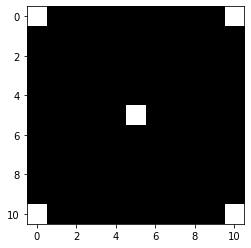

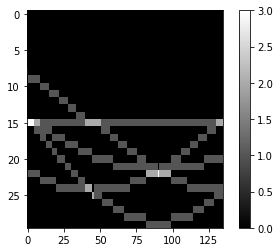

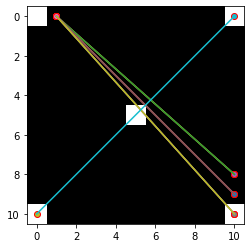

In [134]:
import matplotlib.pyplot as plt
import numpy as np

#Hough Transform Function

def Hough_transform(img):
    H, W = img.shape
    rho = np.int(np.sqrt(H*H + W*W))
    theta = 90
    hough = np.zeros((rho*2,theta*2))
    thetas=np.deg2rad(np.arange(-90,90))
    rhos = np.linspace(-rho, rho, int(2*rho))
    idx_x, idx_y = np.where(img == 1)
    for x, y in zip(idx_x, idx_y):
        for i, t in enumerate(thetas):
            r = y * np.cos(t) + x * np.sin(t)
            hough[int(r), i] += 1
#     hough[:rho, :], hough[rho:, :] = hough[rho:, :], hough[:rho, :]
    ht=np.zeros(hough.shape)
    ht[:rho, :] = hough[rho:, :]
    ht[rho:, :] = hough[:rho, :]
#     print(rhos, thetas)
    return (ht, rhos, thetas)


def plot_detected_line(img, hough, rhos, thetas, threshold):
#     idx_r, idx_t = np.where(hough >= threshold)
#     H, W = img.shape
#     for r, t in zip(idx_r, idx_t):
# #         print('r =',r, 't =',t)
#         r = rhos[r]
#         t = thetas[t] 
#         if np.tan(t) == 0:
#             plt.plot([r]*H, range(W), color='g')
#         else :
#             k = -1/np.tan(t)
#             b = r/np.sin(t)
#             print('k =',k, 'b =',b)
#             plt.plot( range(H), [int(k*x+b) for x in range(H)], color='g')
    thetas = thetas.ravel()
    [rho_index, theta_index]=np.where(hough >= threshold)
#     for i in [rho_index, theta_index]:
#         print(i)
    rho_pt = rhos[rho_index]
    theta_pt = thetas[theta_index]
#     print(rho_pt)
#     print(theta_pt)
    slope = -np.tan(theta_pt)

    x_initial = np.floor(rho_pt*np.cos(theta_pt))
    y_initial = np.floor(rho_pt*np.sin(theta_pt))
    for i in range(x_initial.shape[0]):
        slope_i = slope[i]
        x_i = x_initial[i]
        y_i = y_initial[i]
        x_min=0
        y_min=0
        x_max=img.shape[1]-1
        y_max=img.shape[0]-1
#         print(x_max, y_max)
       
        x1 = x_min
        y1 = round((x_min-x_i)/slope_i+y_i)
       
        x2 = x_max
        y2 = round((x_max-x_i)/slope_i+y_i)
       
        y3 = y_min
        x3 = round((y_min - y_i)*slope_i+x_i)
       
        y4 = y_max
        x4 = round((y_max - y_i)*slope_i+x_i)

        xout=[]
        yout=[]
        if(y1 >= y_min) and (y1<= y_max):
            xout.append(x1)
            yout.append(y1)
        if(y2 >= y_min) and (y2<= y_max):
            xout.append(x2)
            yout.append(y2)
        if(x3 >= x_min) and (x3<= x_max):
            xout.append(x3)
            yout.append(y3)
        if(x4 >= x_min) and (x4<= x_max):
            xout.append(x4)
            yout.append(y4)
#         print(xout, yout)
#         for i in zip(xout, yout):
#             print(i)
#         print('\n')
#         plt.scatter(yout[0], xout[0], edgecolors='r')
#         plt.scatter(yout[0], xout[0], edgecolors='r')
#         plt.plot([yout[0],yout[1]],[xout[0],xout[1]])

        plt.scatter(xout[0], yout[0], edgecolors='r')
        plt.scatter(xout[1], yout[1], edgecolors='r')
        plt.plot([xout[0],xout[1]],[yout[0],yout[1]])



# create your 11x11 test image

# original image
im = np.zeros((11, 11))
# im = np.zeros((101, 101))
# im = np.zeros((151, 101))

H ,W = im.shape
loList = [(0,0), (H-1, 0),((H-1)//2, (W-1)//2),(0, W-1),(H-1, W-1)]
# loList = [(0,0), (H-1, 0),((H-1)//2, (W-1)//4),(0, W-1),(H-1, (W-1)//2)]


k=1
for i in loList:
    im[i[0], i[1]] = 1
#     plt.text(i[0], i[1], k)
    k+=1
# hough transform plot
hough, rhos, thetas = Hough_transform(im)

#Sample call and plot 
plt.imshow(im, cmap='gray')
plt.figure()
plt.imshow(hough[: , 45:], cmap='gray', aspect=5)
plt.colorbar()

plt.figure()
# plt.imshow(imAddLine, cmap='gray')
# plt.imshow(line, cmap='gray')
plot_detected_line(im, hough, rhos, thetas, 3)
plt.imshow(im, cmap='gray')
plt.show()

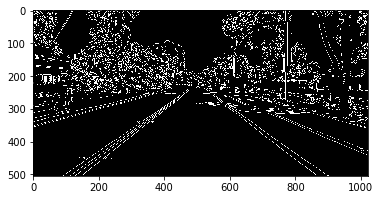

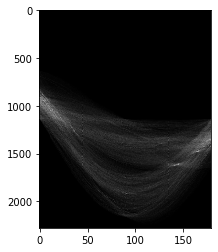

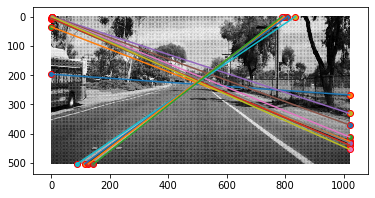

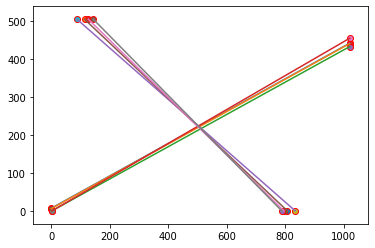

In [135]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from imageio import imread

# load "lane.png"
im = imread("lane.png")
grayimg = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)

gaus = cv2.GaussianBlur(grayimg,(3,3),0)
imCanny = cv2.Canny(gaus, 50, 150, apertureSize=3)
imCanny[np.where(imCanny > 0)] = 1

hough, rhos, thetas = Hough_transform(imCanny)

th = 0.75 * np.max(hough)

# plt.imshow(im, cmap='gray')
# plt.figure()
plt.imshow(imCanny, cmap='gray')
plt.figure()
plt.imshow(hough, cmap='gray', aspect=0.1)
plt.figure()
plt.imshow(im, cmap='gray')
plot_detected_line(im, hough, rhos, thetas ,th)
plt.figure()
# plt.imshow(im, cmap='gray')
plot_detected_line(im, hough[:, 23:], rhos, thetas[23:] ,th)
plt.show()

## Conclusion

Have you accomplished all parts of your assignment? What concepts did you used or learned in this assignment? What difficulties have you encountered? Explain your result for each section. Please wirte one or two short paragraph in the below Markdown window (double click to edit).

**** Your Conclusion: ****

For section 1, the result of 11 * 11 test is not clear. I tried to use 101 * 101 test and the result is similar to GW Third Edition Figure 10.33(b). I don't know why it is required to add a colorbar. I assume different colors show different votes, so the colorbar here shows votes. For notations, I failed to find a good way to write words on image. The result hough is a matrix, not list of parameters of lines. 
For section 2, it is difficult. I used canny detector in opencv, but hough transform was not successful at first. The process needs a lot of time to compute, mainly because rho is a large number. It turned out that the hough transform function is correct and it is plot_detected_lines function that took too much time. It took me several weeks to solve this function, but finally I turned to lan for help and thanks to lan, the final results matched my expectation. The previous functions used equations to compute every point on the detected lines and that required a lot of computation. And the first time lan told me to use plot function in plt, I was not completely understand and again computed every point in a different way. In fact, what I need is only two point of a line and then the function can draw the line for me, and it will need short time to do the computation and draw the lines. 
In iv, I could only narrow theta to an approximate range.
In this assignment, the biggest problem is to give results of each process. I failed to control the axis freely, it is always a mess. 

---
** Submission Instructions**  
Remember to submit you pdf version of this notebook to Gradescope. You can find the export option at File $\rightarrow$ Download as $\rightarrow$ PDF via LaTeX